In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize
from matplotlib import cm
from mapFeature import mapFeature
from plotDecisionBoundary import plotDecisionBoundary
from costFunctionLogisticRegression import costFunctionLogisticRegression
from gradientLogisticRegression import gradientLogisticRegression

## Logistic regression

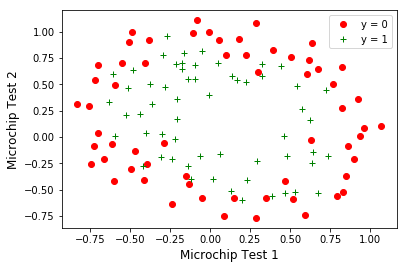

Logistic regression cost with regularization: 0.6931
(28,)


In [4]:
# load the data
data = np.loadtxt('ex2data2.txt', delimiter=',')
X = data[:,0:2]
y = data[:,2].reshape((-1,1))

index0 = np.where(y==0)[0]
index1 = np.where(y==1)[0]

# plot the data
plt.plot(X[index0,0], X[index0,1], 'ro')
plt.plot(X[index1,0], X[index1,1], 'g+')
plt.xlabel('Microchip Test 1', fontsize=12)
plt.ylabel('Microchip Test 2', fontsize=12)
plt.legend(['y = 0', 'y = 1'])
plt.show()

# the data points that are not% linearly separable. However, you would still like to use logistic
# regression to classify the data points
# to do so, you introduce more features to use -- in particular, you add
# polynomial features to our data matrix (similar to polynomial regression).
# note that mapFeature also adds a column of ones for us, so the intercept
# term is handled
degree = 6
Xdata = mapFeature(X[:,0], X[:,1], degree)
initial_theta = np.zeros((Xdata.shape[1],1))

# set regularization parameter lambda to 1
lam = 1

# compute and display initial cost and gradient for regularized logistic regression
cost = costFunctionLogisticRegression(initial_theta, Xdata, y, lam)

print('Logistic regression cost with regularization: %.4f' % cost)

result = minimize(costFunctionLogisticRegression, initial_theta, args=(Xdata, y, lam), jac=gradientLogisticRegression)
print(result.x.shape)